<a href="https://colab.research.google.com/github/Devscoding/MAT421/blob/main/ModuleB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *17.1 Interpolation Problem Statement**
Interpolation can be described as the process of obtaining a function through data points. Regression performs a similiar task, however, interpolation differs in that it assumes that the measurements of our data points are reliable. Whereas regression requires you to find a set of model parameters that minimize error within your data

More Specifically through interpolation given some data for x = [...] and y = [...] goal is to create function y = *f*(x) such that for any value of $x_{i}$ the following holds true: *f*($x_{i}$) = $y_{i}$

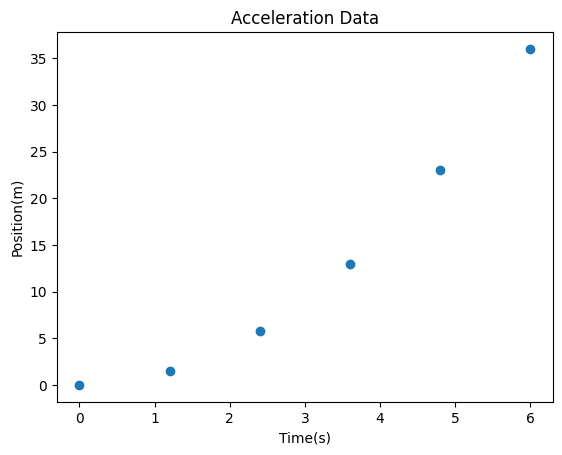

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#Example Data
ind_data = np.linspace(0,6,6)
dep_data = ind_data**2

#Plotting
plt.title('Acceleration Data')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.scatter(ind_data,dep_data)
plt.show()

Through interpolation we are able to create a function where when given any x value we can opbtain a correspodning y value

If we desired to know the value of say *f*(2) this a value it would be difficult through the data we have avaible in our above Position vs. Time graph, however through interpolation this is possible

# **17.2 Linear Interpolation**
Through linear interpolation, the estimated value we desire is assumed to lie on the line joining the left and right data points



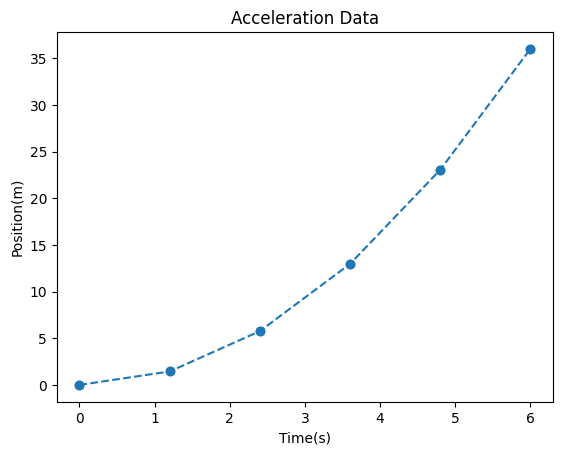

In [3]:
plt.plot(ind_data,dep_data,'o--')
plt.title('Acceleration Data')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.scatter(ind_data,dep_data)
plt.show()

The formula for Linear Interpolation is defined as follow:
*f*($x_{i}$) =$y_{i}$ + $\frac{(y_{i+1} - y_{i})(x_{i} - x_{i})}{(x_{i+1} - x_{i})}$

9.36000


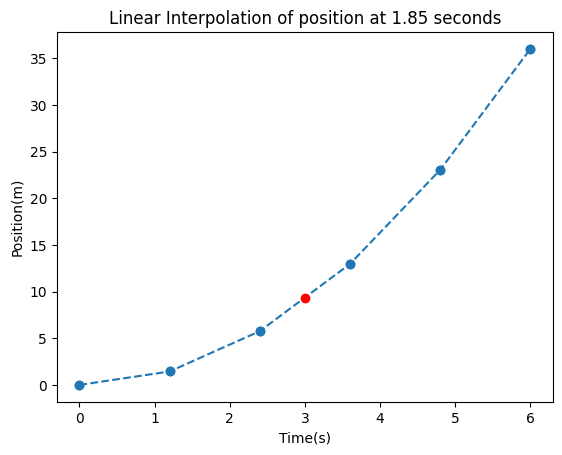

In [15]:
#Performing linear interpolation for our Position vs. Time data
f = interp1d(ind_data,dep_data)
f_hat=f(3)
print(f"{f_hat:.5f}")

#Graph of data and Interpolation value
plt.title('Linear Interpolation of position at 1.85 seconds')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
ind_data = np.linspace(0,6,6)
dep_data = ind_data**2
plt.scatter(ind_data,dep_data)
plt.plot(ind_data,dep_data,'o--')
plt.plot(3,f_hat,'ro')

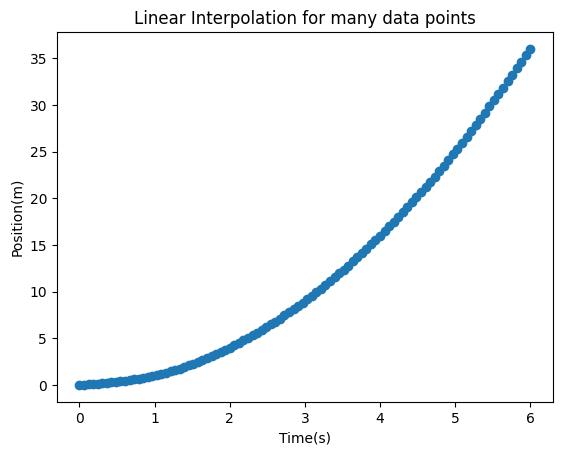

In [35]:
#Obtaining y vales for many x values
x = np.linspace(0,6,100)
y = f(x)

#Plot
plt.title('Linear Interpolation for many data points')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.scatter(x,y)


# 17.3 Cubic Spline Interpolation
Compared to linear interpolation in cubic spline interpolation, the function is a set of piecewise cubic function.

In general we say that the interpolating function is the set of values joined by the cubic polynomial $S_{i}(x)=a_{i}(x^{3})+b_{i}(x^{2})+c_{i}(x)+d_{i}$ that holds for $x_{i} \le x \le x_{x+1}$ for i = 1,...., n-1.

For n points there are n-1 cubic functions to find and for each function there needs to be four coefficients

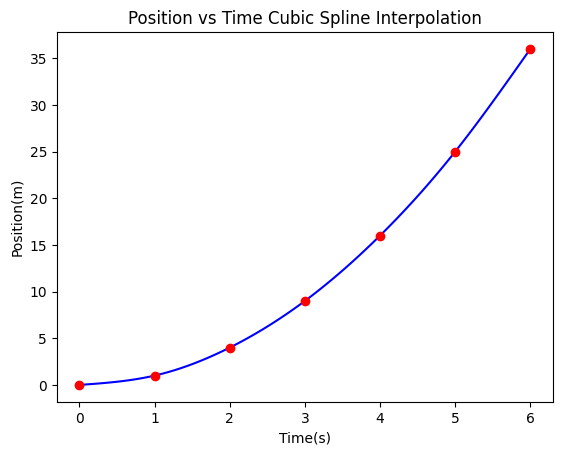

In [23]:
import math
from scipy.interpolate import CubicSpline

ind = [0,1,2,3,4,5,6,]
dep = [x**2 for x in ind]

f = CubicSpline(ind, dep, bc_type ='natural')
ind_new = np.linspace(0,6,100)
dep_new = f(ind_new)

plt.plot(ind_new, dep_new, 'b')
plt.plot(ind, dep, 'ro')
plt.title('Position vs Time Cubic Spline Interpolation')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.show()